## **Prediction of the Canadian Inflation through Machine Learning and Sentiment Analysis**

Sergio Torres ID: 300366657
[Github User](https://github.com/xstorresm) 

Yeison Montoya ID: 300375916
[Github User](https://github.com/yeisonmontoya1815) 

    - Special Topics in Data Analytics CSIS 4260-002
    - Douglas College - Winter 2024

*Developed in Python 3.12.0 and Jupyter Notebook*

**Project Proposal**

In this project, we aim to predict trends in the Canadian market basket using sentiment analysis techniques. Sentiment analysis involves analyzing text data to determine the sentiment expressed, whether positive, negative, or neutral. By applying sentiment analysis to market-related text data, such as customer reviews, social media comments, or news articles, we can gain insights into consumer sentiment towards various products or brands.

**Objectives**

- **Data Collection** a diverse range of textual data from multiple sources, including e-commerce websites, census and statistics, and news articles, pertaining to products or brands within the Canadian market basket.

- **Data Preprocessing** the collected textual data using Python to remove noise, and apply techniques like stopwords removal, punctuation removal, and stemming to prepare the data for sentiment analysis.

- **Sentiment Analysis Model Training** using Python and machine learning techniques, including supervised learning algorithms and deep learning architectures, to assign sentiment scores to the textual data.

- **Prediction and Trend Analysis** assigned to the textual data using Python to identify trends within the Canadian market basket.

- **Insights Generation** from the sentiment analysis results using Python to inform business decisions and identify opportunities for improvement and areas for innovation in the sentiment trends.

- **Evaluation and Validation** Evaluate the performance of the sentiment analysis models using Python and validate the accuracy of the predictions through cross-validation and comparison with ground truth data.

**Exepcted Outcomes**

- A comprehensive report detailing sentiment trends within the Canadian market basket.
- A predictive model capable of accurately determining sentiment for gathered news data.
- A validation section that confirms the reliability of your model through statistical metrics.

## - **Chapter 1 - Data Collection, Preprocessing and Cleaning**

**Basket Weights in Relation to the CPI**

The basket weights utilized in this tool correspond to the latest update of the CPI basket, and they are expressed based on prices at the month of basket linkage. Generally, these weights are revised annually to accommodate changes in consumer spending tendencies.


**[Basket Weights in Canada ](https://www150.statcan.gc.ca/n1/pub/71-607-x/2018016/cpi-ipc-eng.htm)**

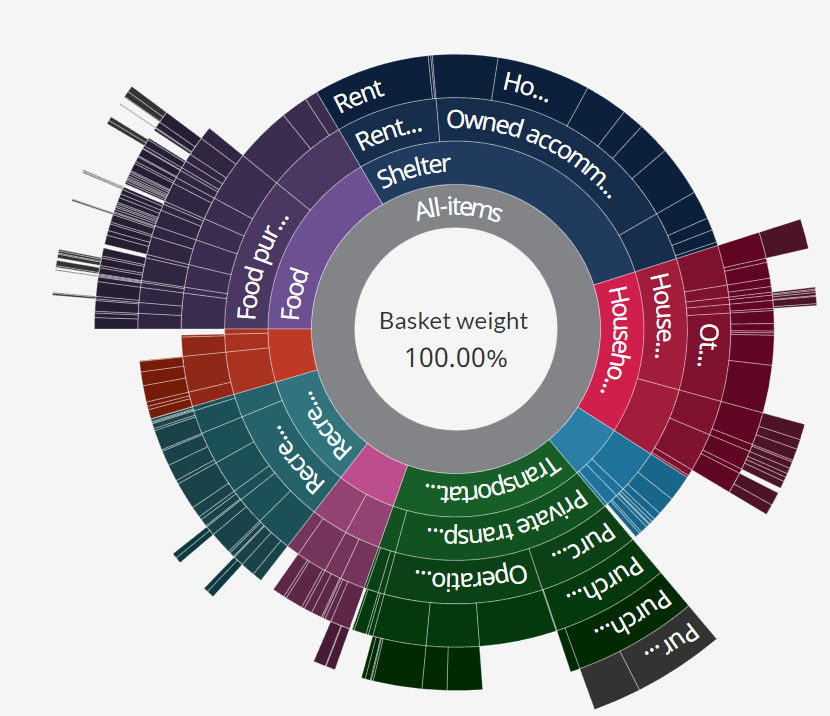


*where the weights are distributed as follows:*

$$
\text{Inflation Index} = 28.34\% \times \text{Shelter} + 16.65\% \times \text{Food} + 16.44\% \times \text{Transportation} + 14.36\% \times \text{Household operations, furnishings and equipment} \\
+ 9.92\% \times \text{Recreation, education and reading} + 5.03\% \times \text{Health and personal care} + 4.73\% \times \text{Clothing and footwear} + 4.53\% \times \text{Alcoholic beverages, tobacco products and recreational cannabis}
$$



**Understanding Canada’s Chartered Banks’ Interest Rates:**

[Canada’s chartered banks](https://www.bankofcanada.ca/rates/interest-rates/canadian-interest-rates/?lookupPage=lookup_canadian_interest.php&startRange=2014-04-03&rangeType=dates&dFrom=2022-01-01&dTo=2024-04-03&rangeValue=1&rangeWeeklyValue=1&rangeMonthlyValue=1&series%5B%5D=V122530&ByDate_frequency=daily&submit_button=Submit)


The Bank of Canada’s interest rates serve as a crucial benchmark in our model validation process. This platform offers comprehensive insights into the nation’s interest rate policies, which are instrumental for tracking economic trends, making strategic financial decisions, or conducting academic research. It stands as a pivotal resource, reflecting the influence of interest rate fluctuations across different economic sectors.

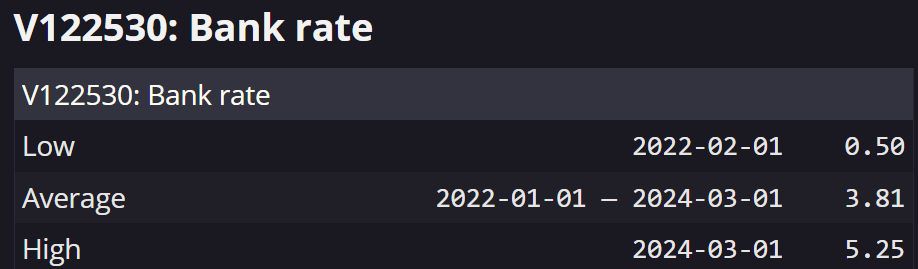

**Understanding the Consumer Price Index - CPI**

[CPI data](https://www.bankofcanada.ca/rates/price-indexes/cpi/)

The Consumer Price Index (CPI) measures the variation in prices paid by Canadians for a standard set of goods and services over time. It tracks the cost fluctuations of this consistent basket to gauge consumer price changes.

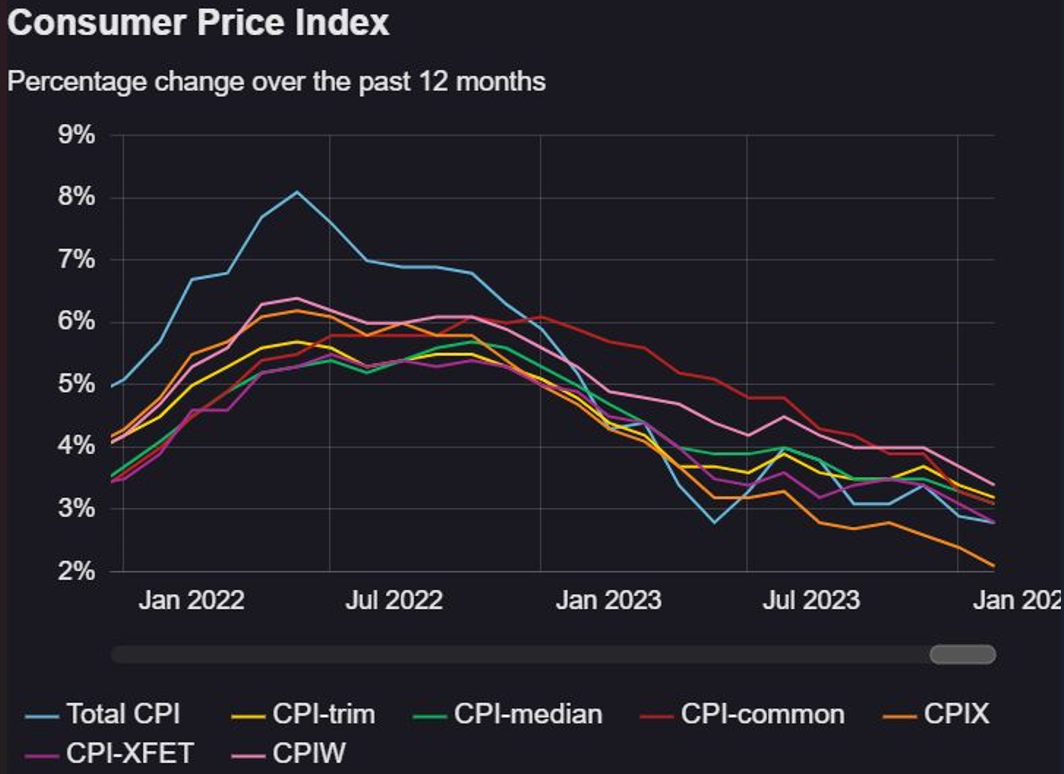

**Data Preprocessing and Cleaning**

The code segment demonstrates crucial data preprocessing steps, encompassing loading, cleaning, and transformation, pivotal for subsequent inflation trend analysis.

- Initially, essential libraries, **Pandas** and **NumPy**, are imported, facilitating data manipulation and analysis. Pandas excels in data manipulation, while NumPy supports mathematical operations on arrays and matrices.

- Subsequently, a CSV file named `'1810000401_Inflation_Basket2_new.csv'` is read into a Pandas DataFrame named `'data'`, likely containing historical inflation data.

- The `'Date'` column of the DataFrame is then converted to datetime format using `pd.to_datetime()`, crucial for time-based analysis.

- Following this, the DataFrame is sorted chronologically based on the `'Date'` column using `sort_values()`.

- The DataFrame is filtered to retain rows with `'Date'` on or after September 1, 2022, focusing the analysis on recent trends.

- Rows with NaN values are removed using `dropna()` with `how='all'`, ensuring data integrity.

- Finally, the DataFrame index is reset using `reset_index()` with `drop=True`, maintaining data consistency for subsequent analysis.


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Load the dataset into a pandas DataFrame
data = pd.read_csv('1810000401_Inflation_Basket2_new.csv') 
df = pd.DataFrame(data)

# Convert the 'Date' column to datetime format for proper sorting and manipulation
df['Date'] = pd.to_datetime(df['Date'])

# Sort the DataFrame based on the 'Date' column in ascending order
df.sort_values(by='Date', inplace=True)

# Filter the DataFrame to include only rows from January 1, 2022, onwards
df = df[df['Date'] >= '2022-01-01']

# Remove all rows that contain only NaN values to clean the dataset
df.dropna(how='all', inplace=True)

# Reset the index of the DataFrame and drop the old index to maintain data integrity
df.reset_index(drop=True, inplace=True)

# Display the first few rows of the cleaned DataFrame
df.head(3)


,Date,Inflation_Change,CPI,Food 5,Shelter 6,"Household operations, furnishings and equipment",Clothing and footwear,Transportation,Health and personal care,"Recreation, education and reading","Alcoholic beverages, tobacco products and recreational cannabis",Interest Rate
0,2022-01-01,0,0.051,163.9,157.6,126.7,93.4,156.9,134.1,119.2,178.2,0.50
1,2022-02-01,0,0.057,166.0,158.6,127.6,93.8,159.9,134.6,120.9,178.5,0.50
2,2022-03-01,0,0.067,167.5,160.2,129.1,94.5,165.5,134.9,123.1,179.3,0.75


In [2]:
df['Date'] = pd.to_datetime(df['Date'])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 12 columns):
 #   Column                                                           Non-Null Count  Dtype         
---  ------                                                           --------------  -----         
 0   Date                                                             26 non-null     datetime64[ns]
 1   Inflation_Change                                                 26 non-null     int64         
 2   CPI                                                              26 non-null     float64       
 3   Food 5                                                           26 non-null     float64       
 4   Shelter 6                                                        26 non-null     float64       
 5   Household operations, furnishings and equipment                  26 non-null     float64       
 6   Clothing and footwear                                            26 non-null     flo

## - **Chapter 2 - Exploratory Data Analysis - EDA** 

In [4]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix
correlation_matrix


,Date,Inflation_Change,CPI,Food 5,Shelter 6,"Household operations, furnishings and equipment",Clothing and footwear,Transportation,Health and personal care,"Recreation, education and reading","Alcoholic beverages, tobacco products and recreational cannabis",Interest Rate
Date,1.000000,0.404642,-0.839698,0.974196,0.993806,0.307782,0.100155,0.325342,0.979108,0.562771,0.988851,0.924026
Inflation_Change,0.404642,1.000000,-0.204416,0.473229,0.384414,0.600318,0.171154,0.034385,0.450591,0.270781,0.404843,0.577004
CPI,-0.839698,-0.204416,1.000000,-0.804123,-0.794674,0.026564,-0.003578,0.040308,-0.824032,-0.402524,-0.872594,-0.713280
Food 5,0.974196,0.473229,-0.804123,1.000000,0.956124,0.462200,0.182738,0.341278,0.989818,0.596701,0.982918,0.971092
Shelter 6,0.993806,0.384414,-0.794674,0.956124,1.000000,0.301702,0.105120,0.378925,0.964644,0.565625,0.971939,0.903832
"Household operations, furnishings and equipment",0.307782,0.600318,0.026564,0.462200,0.301702,1.000000,0.554584,0.551828,0.437975,0.558543,0.340731,0.561403
Clothing and footwear,0.100155,0.171154,-0.003578,0.182738,0.105120,0.554584,1.000000,0.366323,0.214153,0.495529,0.143804,0.236431
Transportation,0.325342,0.034385,0.040308,0.341278,0.378925,0.551828,0.366323,1.000000,0.379190,0.735692,0.315003,0.326630
Health and personal care,0.979108,0.450591,-0.824032,0.989818,0.964644,0.437975,0.214153,0.379190,1.000000,0.642521,0.988971,0.957446
"Recreation, education and reading",0.562771,0.270781,-0.402524,0.596701,0.565625,0.558543,0.495529,0.735692,0.642521,1.000000,0.598200,0.595008


**Removing Columns and Separating Features and Response**

In [5]:
# Dropping unnecessary columns from the DataFrame
df = df.drop(['Date','CPI'], axis=1)

# Separating features and response variable
features = df.drop(['Inflation_Change'], axis=1)
response = df['Inflation_Change']

# Displaying the shape of the features DataFrame
features_shape = features.shape
features_shape


(26, 9)

**Feature Sellection**

In [6]:
features.columns

Index(['Food 5', 'Shelter 6',
       'Household operations, furnishings and equipment',
       'Clothing and footwear', 'Transportation', 'Health and personal care',
       'Recreation, education and reading',
       'Alcoholic beverages, tobacco products and recreational cannabis',
       'Interest Rate'],
      dtype='object')

The output provides a list of features extracted from the dataset. These features include categories such as:

    - 'Food'
    - 'Shelter'
    - 'Transportation'
    - 'Clothing'
    - 'Healthcare'
    - 'Recreation'
    - 'Alcoholic beverages'
    - 'Tobacco products'
    - 'Household operations'
    - 'Interest Rate'

Each of these features represents a different aspect of consumer spending and economic indicators. This information is essential for further analysis and modeling tasks, providing insight into the factors that may influence changes in inflation rates.

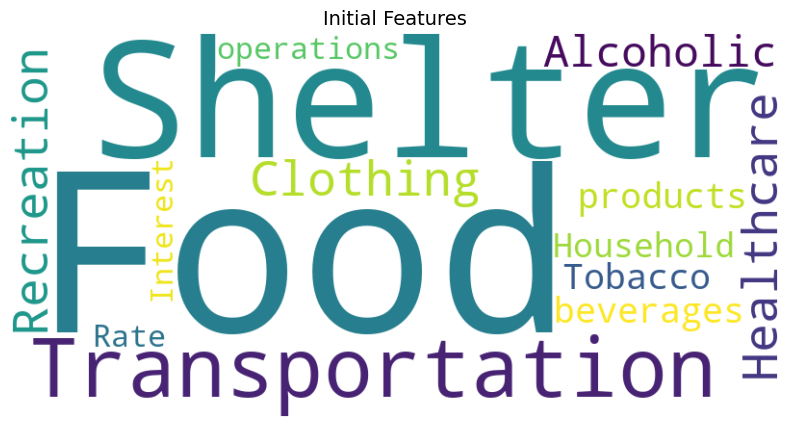

In [7]:
# %pip install wordcloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# List of words
words = ['Food', 'Shelter', 'Transportation', 'Clothing', 'Healthcare', 
         'Recreation', 'Alcoholic beverages', 'Tobacco products', 
         'Household operations', 'Interest Rate']

# Convert the list of words into a string
text = ' '.join(words)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Initial Features', fontsize=14)
plt.show()



#### **Feature Selection Pipeline with Logistic Regression**

In [8]:
# Importing necessary libraries
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

# Defining the machine learning pipeline
pipe_lr = Pipeline([
    ('MinMax_Scaler', MinMaxScaler()),  # Scaling features to a specified range using MinMaxScaler
    ('Logistic_regression', SelectFromModel(estimator=LogisticRegression(max_iter=5000)))  # Selecting features using logistic regression
])

# Fitting the pipeline to the data
pipe_lr.fit(features, response)


Pipeline(steps=[('MinMax_Scaler', MinMaxScaler()),
                ('Logistic_regression',
                 SelectFromModel(estimator=LogisticRegression(max_iter=5000)))])

In [9]:
# Transforming and Extracting Selected Features

# Apply the feature selection pipeline (pipe_lr) to transform the input features (features) into a new feature set (X_1)
X_1 = pipe_lr.transform(features)

# Retrieve the shape of the transformed feature set (X_1) to determine the number of samples and selected features
X_1_shape = X_1.shape


In [10]:
# Extracting Selected Features

# Retrieve the indices of the selected features from the logistic regression model in the pipeline (pipe_lr)
features_selected_lr = pipe_lr['Logistic_regression'].get_support(indices=True)

# Get the names of the selected features using their indices
selected_feature_names_lr = features.columns[features_selected_lr]

# Create a new DataFrame (df_features_selected_lr) containing only the selected features
# The transformed feature set (X_1) is used, and the selected feature names are assigned as column names
df_features_selected_lr = pd.DataFrame(X_1, columns=selected_feature_names_lr)

# Display the column names of the DataFrame containing the selected features
selected_feature_names_lr


Index(['Food 5', 'Household operations, furnishings and equipment',
       'Interest Rate'],
      dtype='object')

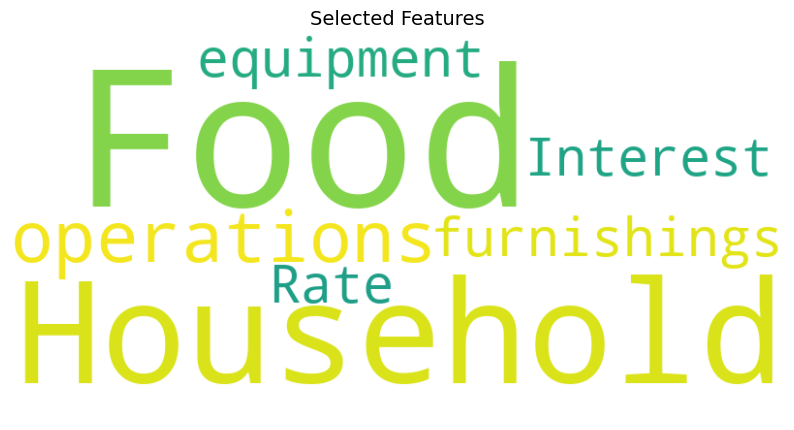

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Define the list of features
features = ['Food 5', 'Household operations, furnishings and equipment', 'Interest Rate']

# Combine all features into a single string
text = ' '.join(features)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Selected Features', fontsize=14)
plt.show()


## - **Chapter 3 - Initial Model Training** 

In [12]:
# Splitting the Data into Training and Testing Sets

# Importing the necessary function from scikit-learn to split the data
from sklearn.model_selection import train_test_split

# Splitting the transformed feature set (X_1) and the response variable (response) into training and testing sets
# The test set size is set to 30% of the total data, and a random seed (random_state) of 42 is used for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X_1, response, test_size=0.30, random_state=42)


In [13]:
# Hyperparameter Tuning for Support Vector Classifier (SVC)

# Importing the Support Vector Classifier (SVC) from scikit-learn
from sklearn.svm import SVC

# Specifying the values to search for the best hyperparameters
gammas = [0.001, 0.01, 0.1, 1, 10]
Cs = [0.01, 0.1, 1, 10, 100]

# Initializing variables to store the best score and corresponding hyperparameters
best_score = 0
best_C = 0
best_gamma = 0

# Iterating over each combination of gamma and C values
for gamma in gammas:
    for C in Cs:
        # Creating an SVC instance with the current gamma and C values
        svm = SVC(gamma=gamma, C=C, random_state=42)
        
        # Fitting the SVC model to the training data
        svm.fit(X_train, y_train)
        
        # Calculating the accuracy score on the testing data
        score = svm.score(X_test, y_test)
        
        # Updating the best score and corresponding hyperparameters if the current score is higher
        if score > best_score:
            best_score = score
            best_C = C
            best_gamma = gamma
            
# Printing the best score and corresponding hyperparameters
print('Best Score:', best_score)
print('Best C:', best_C)
print('Best gamma:', best_gamma)


Best Score: 1.0
Best C: 100
Best gamma: 0.01


### **Choosing the best classifiers**

In [14]:
# Model Selection and Evaluation

# Importing necessary libraries
from sklearn.model_selection import cross_val_score, KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Defining a list of classifiers with their corresponding names
classifiers = [('Naive_Bayes', GaussianNB()),
               ('Logistic_Regression', LogisticRegression()),
               ('Random_Forest', RandomForestClassifier(max_depth=3, n_estimators=1000)),
               ('Decision_Tree', DecisionTreeClassifier(max_depth=3, random_state=0)),
               ('svc_linear', SVC(kernel='linear', C=0.025, probability=True)),
               ('svm', SVC(gamma=best_gamma, C=best_C, probability=True, random_state=0))
              ]

# Initializing variables to store results
list_accuracy = []
best_classifier = 0
chosen_classifier = 0

# Initializing KFold for cross-validation
kf = KFold(n_splits=3, shuffle=True, random_state=42)

# Looping through each classifier and evaluating its performance using cross-validation
for n, clf in classifiers:
    # Performing cross-validation
    score = cross_val_score(clf, X_train, y_train, cv=kf, scoring='accuracy')
    
    # Calculating the mean score
    mean_score = np.mean(score)
    
    # Appending the classifier name and mean score to the list
    list_accuracy.append((n, mean_score))
    
    # Updating the best classifier if the current mean score is higher
    if best_classifier < mean_score:
        best_classifier = mean_score
        chosen_classifier = clf

# Converting the list of results into a DataFrame
results_df = pd.DataFrame(list_accuracy, columns=['Name', 'MeanScore'])
results_df


,Name,MeanScore
0,Naive_Bayes,0.722222
1,Logistic_Regression,0.722222
2,Random_Forest,0.722222
3,Decision_Tree,0.722222
4,svc_linear,0.611111
5,svm,0.777778


In [15]:
# Fitting the chosen classifier on the training data
chosen_classifier.fit(X_train, y_train)


SVC(C=100, gamma=0.01, probability=True, random_state=0)

In [16]:
# Function to calculate recall score
def get_recall_score(model):
    '''
    Calculate recall scores for the model on both training and test sets.

    Parameters:
    model (classifier): The classifier to predict values of X.

    Returns:
    None
    '''
    # Predicting labels for training and test sets
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    # Computing recall scores
    recall_train = metrics.recall_score(y_train, pred_train)
    recall_test = metrics.recall_score(y_test, pred_test)
    
    # Printing recall scores
    print("Recall on training set: ", recall_train)
    print("Recall on test set: ", recall_test)


In [17]:
from sklearn import metrics

# Calculate and print accuracy on training and test sets
print("Accuracy on training set: ", chosen_classifier.score(X_train, y_train))
print("Accuracy on test set: ", chosen_classifier.score(X_test, y_test))

# Calculate and print recall scores on training and test sets
get_recall_score(chosen_classifier)


Accuracy on training set:  0.7222222222222222
Accuracy on test set:  1.0
Recall on training set:  0.8181818181818182
Recall on test set:  1.0


In [18]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth

    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

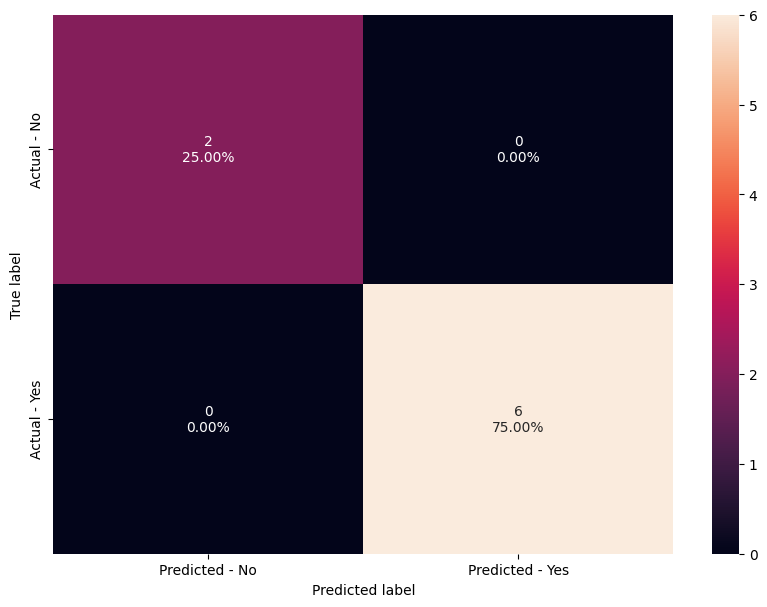

In [19]:
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

make_confusion_matrix(chosen_classifier,y_test)

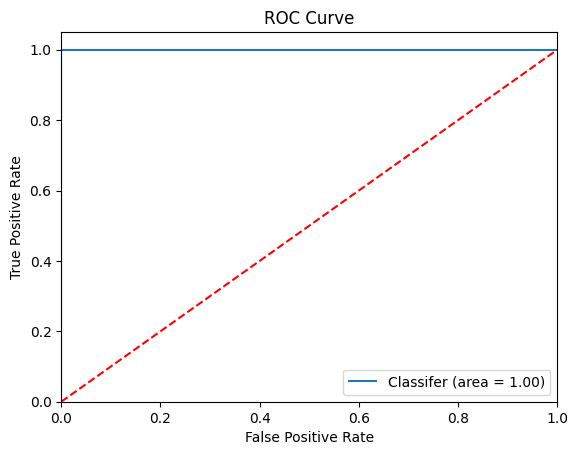

In [20]:
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import roc_curve #plot the curve 

rf_roc_auc = roc_auc_score(y_test, chosen_classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, chosen_classifier.predict_proba(X_test)[:,1]) 

plt.figure()
plt.plot(fpr, tpr, label='Classifer (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [21]:
# Check the unique classes in y_true
unique_classes = np.unique(y_test)
if len(unique_classes) < 2:
    print("Error: Only one class present in y_true. Cannot calculate ROC AUC.")
else:
    # Proceed with ROC AUC calculation
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    
    # Your code for ROC AUC calculation here
    rf_roc_auc = roc_auc_score(y_test, chosen_classifier.predict(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, chosen_classifier.predict_proba(X_test)[:,1]) 
    plt.figure()
    # Plot ROC curve and other relevant visualizations


<Figure size 640x480 with 0 Axes>

In [22]:
rf_roc_auc

1.0

## - **Chapter 4 - Evaluation of our Model and Validation**

**Loading and Preprocessing Google News Data**

In [23]:
import pandas as pd
import numpy as np

# Load the news data from a CSV file
data = pd.read_csv('news.csv') 
final_news_df = pd.DataFrame(data)

# Remove all rows that contain NaN values in the original DataFrame
final_news_df.dropna(how='all', inplace=True)

# Reset the index for the original DataFrame
final_news_df.reset_index(drop=True, inplace=True)

# Display the first few rows of the DataFrame
final_news_df.head()


,Title,Source,Time,Link,Keywords
0,A snapshot of how inflation is affecting Canad...,Statistique Canada,"Feb 27, 2023",https://news.google.com/articles/CBMiVGh0dHBzO...,Canada inflation
1,What's happening to inflation and why it matters,Bank of Canada,"Oct 6, 2022",https://news.google.com/articles/CBMiVGh0dHBzO...,Canada inflation
2,Canadian Inflation: A New Vintage,TD Economics,"Apr 27, 2022",https://news.google.com/articles/CBMiMWh0dHBzO...,Canada inflation
3,Canada's inflation rate slowed to 2.9% in Janu...,CBC News,Feb 20,https://news.google.com/articles/CBMiQWh0dHBzO...,Canada inflation
4,Canada inflation rate ticks down to 2.8 per cent,CP24,Mar 19,https://news.google.com/articles/CBMidWh0dHBzO...,Canada inflation


**Preprocessing News Dates**

In [24]:
import pandas as pd
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta

# Import re module for regular expressions
import re

# Get the current date
current_date = pd.to_datetime('today')
current_month = current_date.month
current_year = current_date.year

# Iterate through each row in the DataFrame
for index, row in final_news_df.iterrows():
    date_str = row['Time']
    
    # Check if the date string is already in the format 'YYYY-MM-DD'
    if re.match(r'^\d{4}-\d{2}-\d{2}$', date_str):
        # If so, keep the value unchanged'
        continue
    
    # Check if the date string represents 'X days ago'
    elif re.match(r'^\d+ days ago$', date_str):
        days_ago = int(date_str.split()[0])
        date = current_date - pd.Timedelta(days=days_ago)
    
    # Check if the date string represents 'X hours ago'
    elif re.match(r'^\d+ hours ago$', date_str):
        hours_ago = int(date_str.split()[0])
        date = current_date - pd.Timedelta(hours=hours_ago)
    
    # Check if the date string represents 'X hour ago'
    elif re.match(r'^\d+ hour ago$', date_str):
        date = current_date 
    
    # Check if the date string represents 'X minutes ago'  
    elif re.match(r'^\d+ minutes ago$', date_str):
        minutes_ago = int(date_str.split()[0])
        date = current_date - pd.Timedelta(minutes=minutes_ago)

    elif re.match(r'^[A-Z][a-z]{2} \d{1,2}, \d{4}$', date_str):
        month_str, day_str, year_str = date_str.split()

        # Convert month abbreviation to month number
        month_dict = {
            'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
            'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
        }
        month = month_dict[month_str]

        # Convert day to integer
        day = int(day_str.strip(','))

        # Convert year to integer
        year = int(year_str)

        # Construct the date string
        date_str = f'{year}-{month:02d}-{day:02d}'

        # Convert the date string to a Timestamp object
        date = pd.to_datetime(date_str)

    # Check if the date string is "Yesterday"
    elif date_str == 'Yesterday':
        date = current_date - pd.Timedelta(days=1)

    # If the date string represents 'Month-Day'
    else:
        month_str, day_str = date_str.split(' ')

        # Convert month abbreviation to month number
        month_dict = {
            'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
            'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
        }
        month = month_dict[month_str]

        # Convert day to integer
        day = int(day_str)

        # Determine the year based on the current month
        year = current_year - 1 if month > current_month else current_year

        # Construct the date string
        date_str = f'{year}-{month:02d}-{day:02d}'

        # Convert the date string to a Timestamp object
        date = pd.to_datetime(date_str)

    # Update the "Time" column with the formatted date
    final_news_df.at[index, 'Time'] = date.strftime('%Y-%m-%d')


**Preprocessing and Filtering News Data**

In [25]:
# Convert 'Time' column to datetime format
final_news_df['Time'] = pd.to_datetime(final_news_df['Time'], format='%Y-%m-%d')

# Remove duplicate rows based on 'Title' and 'Time'
final_news_df = final_news_df.drop_duplicates(subset=['Title', 'Time'])

# Filter data to include dates starting from January 1, 2022
final_news_df = final_news_df[final_news_df['Time'] >= '2022-01-01']

# Display information about the DataFrame
print(final_news_df.info())

# Save the preprocessed DataFrame to a CSV file
final_news_df.to_csv('news2.csv', index=False)


<class 'pandas.core.frame.DataFrame'>
Index: 344 entries, 0 to 359
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Title     344 non-null    object        
 1   Source    344 non-null    object        
 2   Time      344 non-null    datetime64[ns]
 3   Link      344 non-null    object        
 4   Keywords  344 non-null    object        
dtypes: datetime64[ns](1), object(4)
memory usage: 16.1+ KB
None


**Sentiment Analysis of News Data**

In [26]:
# install just once, after that comment the code for better performance 
# %pip install textblob

In [27]:
# Import necessary libraries
from textblob import TextBlob
import pandas as pd

# Initialize an empty list to store sentiment results
sentiment_results = []

# Group news data by month and keywords, then analyze sentiment
for (month, keyword), group in final_news_df.groupby([pd.Grouper(freq='M', key='Time'), 'Keywords']):
    # Concatenate titles within each group
    month_keyword_text = ' '.join(group['Title'])
    
    # Perform sentiment analysis using TextBlob
    blob = TextBlob(month_keyword_text)
    average_sentiment = blob.sentiment.polarity
    average_subjectivity = blob.sentiment.subjectivity

    # Append sentiment results to the list
    sentiment_results.append({'Month': pd.to_datetime(month).strftime('%Y-%m'), 'Keyword': keyword, 'Average Sentiment': average_sentiment, 'Average Subjectivity': average_subjectivity})

# Create a DataFrame from the sentiment results
sentiment_df = pd.DataFrame(sentiment_results)

# Save the sentiment DataFrame to a CSV file
sentiment_df.to_csv('sentiment_results.csv', index=False)

# Display the sentiment DataFrame
print(sentiment_df)


      Month           Keyword  Average Sentiment  Average Subjectivity
0   2022-01  Canada inflation           0.098788              0.464848
1   2022-02  Canada inflation           0.000000              0.000000
2   2022-02       Canada rent           0.000000              0.000000
3   2022-03  Canada inflation           0.160000              0.540000
4   2022-03       Canada rent           0.000000              0.000000
5   2022-04  Canada inflation           0.144242              0.483030
6   2022-05  Canada inflation           0.148182              0.497273
7   2022-05       Canada rent           0.166667              0.333333
8   2022-06  Canada inflation           0.173333              0.426667
9   2022-06       Canada rent           0.000000              0.000000
10  2022-07  Canada inflation           0.098788              0.531515
11  2022-08  Canada inflation           0.250000              0.333333
12  2022-08       Canada rent           0.142222              0.401111
13  20

C:\Users\yeiso\AppData\Local\Temp\ipykernel_27112\2695005897.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  for (month, keyword), group in final_news_df.groupby([pd.Grouper(freq='M', key='Time'), 'Keywords']):


In [28]:
sentiment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Month                 51 non-null     object 
 1   Keyword               51 non-null     object 
 2   Average Sentiment     51 non-null     float64
 3   Average Subjectivity  51 non-null     float64
dtypes: float64(2), object(2)
memory usage: 1.7+ KB


**Sentiment Analysis of Selected Keywords Over Time**

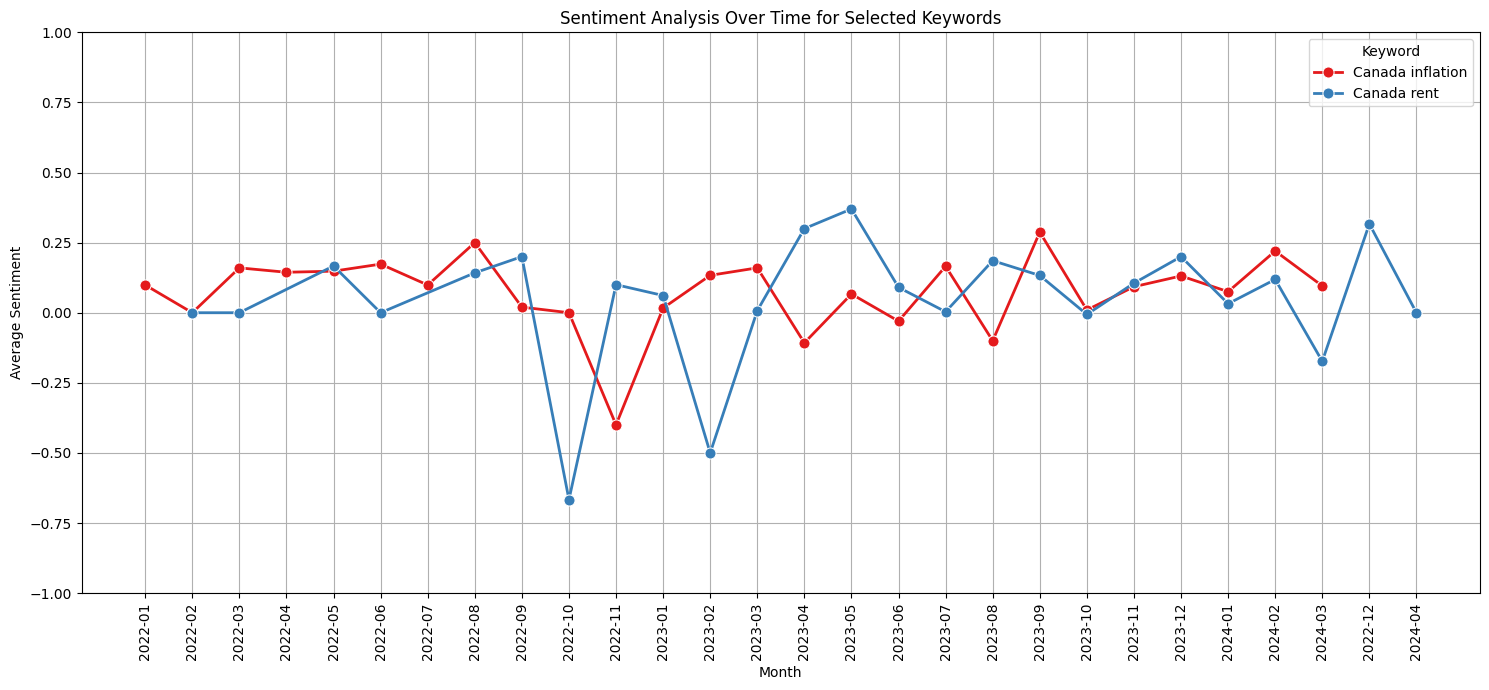

In [29]:
# Importing necessary libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Define the keywords to consider
keywords_to_consider = ['Canada inflation', 'Canada rent']

# Filter sentiment_df to include only specified keywords
filtered_sentiment_df = sentiment_df[sentiment_df['Keyword'].isin(keywords_to_consider)]

# Plot sentiment analysis over time for selected keywords
plt.figure(figsize=(15,7))
plt.title('Sentiment Analysis Over Time for Selected Keywords')

# Use a distinct color palette
colors = sns.color_palette('Set1', n_colors=len(keywords_to_consider))

# Plot each keyword separately with different line styles and markers
for i, keyword in enumerate(keywords_to_consider):
    sns.lineplot(data=filtered_sentiment_df[filtered_sentiment_df['Keyword'] == keyword],
                 x='Month', y='Average Sentiment',
                 linewidth=2, linestyle='-', marker='o',
                 markersize=8, color=colors[i], label=keyword)

plt.xticks(rotation=90)
plt.ylim(-1, 1)
plt.xlabel('Month')
plt.ylabel('Average Sentiment')
plt.grid(True)
plt.legend(title='Keyword', loc='upper right')
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


c:\Users\yeiso\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\yeiso\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


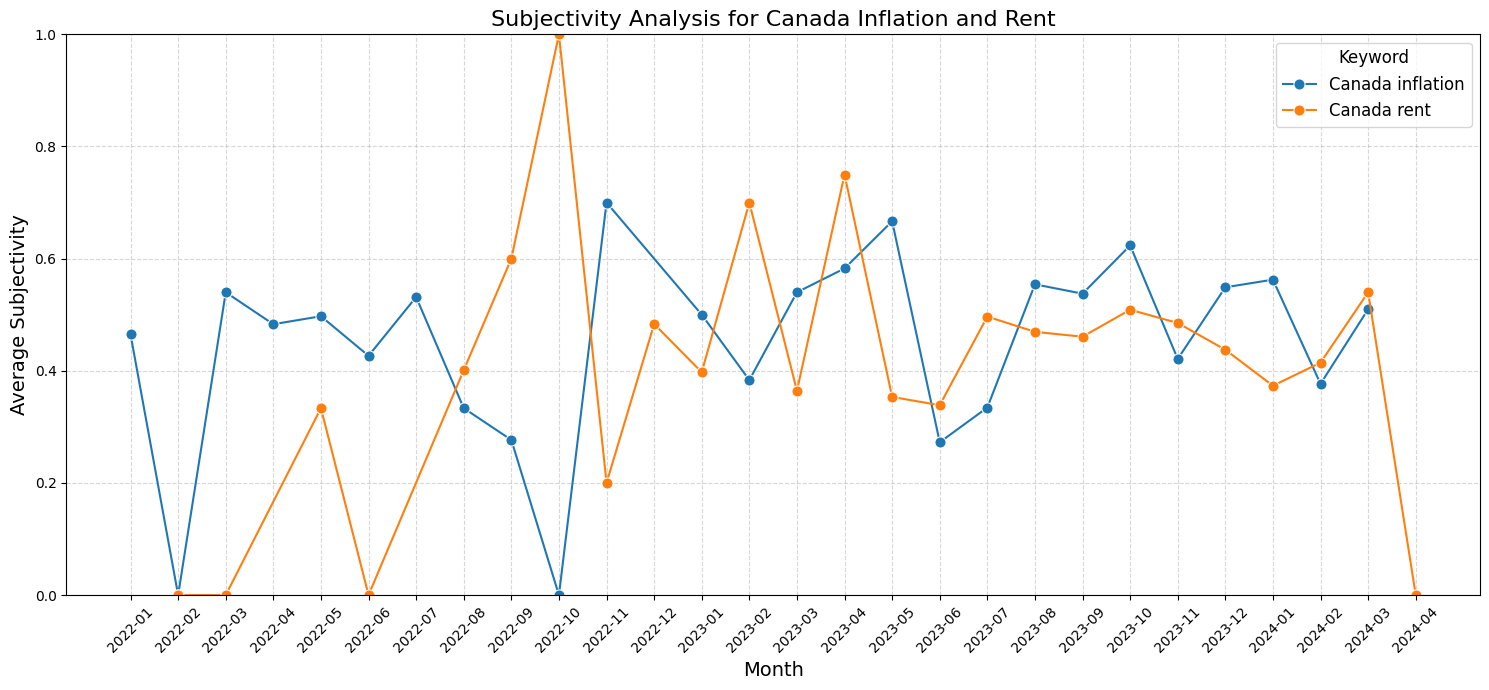

In [30]:
# Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Define the keywords of interest
keywords_to_consider = ['Canada inflation', 'Canada rent']

# Filter the sentiment dataframe for specified keywords
filtered_sentiment_df = sentiment_df[sentiment_df['Keyword'].isin(keywords_to_consider)]

# Set the figure size and title
plt.figure(figsize=(15, 7))
plt.title('Subjectivity Analysis for Canada Inflation and Rent', fontsize=16)

# Plot the subjectivity analysis using seaborn lineplot
sns.lineplot(data=filtered_sentiment_df, x='Month', y='Average Subjectivity', hue='Keyword', marker='o', markersize=8)

# Rotate x-axis tick labels for better readability
plt.xticks(rotation=45)

# Set y-axis limit
plt.ylim(0, 1)

# Set axis labels
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Subjectivity', fontsize=14)

# Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Adjust legend position
plt.legend(title='Keyword', fontsize=12, title_fontsize=12, loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()


**Importing and Preprocessing Inflation Data**

In [31]:
import pandas as pd

# Read the inflation data from CSV file
data = pd.read_csv('1810000401_Inflation_Basket2_new.csv') 
df = pd.DataFrame(data)

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Filter data for dates starting from January 2022
df = df[df['Date'] >= '2022-01-01']

# Sort the DataFrame by date
df.sort_values(by='Date', inplace=True)

# Remove rows with NaN values
df.dropna(how='all', inplace=True)

# Reset the index of the DataFrame
df.reset_index(drop=True, inplace=True)

# Display the first few rows of the DataFrame
df.head()


,Date,Inflation_Change,CPI,Food 5,Shelter 6,"Household operations, furnishings and equipment",Clothing and footwear,Transportation,Health and personal care,"Recreation, education and reading","Alcoholic beverages, tobacco products and recreational cannabis",Interest Rate
0,2022-01-01,0,0.051,163.9,157.6,126.7,93.4,156.9,134.1,119.2,178.2,0.50
1,2022-02-01,0,0.057,166.0,158.6,127.6,93.8,159.9,134.6,120.9,178.5,0.50
2,2022-03-01,0,0.067,167.5,160.2,129.1,94.5,165.5,134.9,123.1,179.3,0.75
3,2022-04-01,0,0.068,169.0,161.9,129.8,95.1,166.3,137.0,121.6,179.8,1.25
4,2022-05-01,0,0.077,170.4,163.0,131.5,97.2,172.2,137.2,123.9,180.4,1.25


**Importing and Preprocessing Sentiment Results**

In [32]:
import pandas as pd

# Read sentiment results from CSV file
data = pd.read_csv('sentiment_results.csv') 
sentiment = pd.DataFrame(data)

# Remove rows with NaN values
sentiment.dropna(how='all', inplace=True)

# Reset the index of the DataFrame
sentiment.reset_index(drop=True, inplace=True)

# Display the first few rows of the DataFrame
sentiment.head()


,Month,Keyword,Average Sentiment,Average Subjectivity
0,2022-01,Canada inflation,0.098788,0.464848
1,2022-02,Canada inflation,0.000000,0.000000
2,2022-02,Canada rent,0.000000,0.000000
3,2022-03,Canada inflation,0.160000,0.540000
4,2022-03,Canada rent,0.000000,0.000000


**Importing and Transforming Sentiment Data**

In [33]:
import pandas as pd

# Convert 'Month' column to datetime format
sentiment['Month'] = pd.to_datetime(sentiment['Month'], format='%Y-%m', errors='coerce')

# Display information about the transformed DataFrame
print(sentiment.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Month                 51 non-null     datetime64[ns]
 1   Keyword               51 non-null     object        
 2   Average Sentiment     51 non-null     float64       
 3   Average Subjectivity  51 non-null     float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 1.7+ KB
None


**Transforming Sentiment Data with Pivot**

In [34]:
import pandas as pd

# Assuming you already have the 'sentiment' DataFrame with the required columns

# Pivot the DataFrame to create separate columns for each type of record in "Keyword"
pivot_df = sentiment.pivot(index='Month', columns='Keyword', values=['Average Sentiment', 'Average Subjectivity'])

# Flatten the multi-level column index
pivot_df.columns = [' '.join(col).strip() for col in pivot_df.columns.values]

# Reset the index to have a sequential index and add a "Month" column
pivot_df.reset_index(inplace=True)
pivot_df['Month'] = pd.to_datetime(pivot_df['Month'])  # Convert 'Month' back to datetime if needed

# Display the updated DataFrame information
print(pivot_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 5 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   Month                                  28 non-null     datetime64[ns]
 1   Average Sentiment Canada inflation     26 non-null     float64       
 2   Average Sentiment Canada rent          25 non-null     float64       
 3   Average Subjectivity Canada inflation  26 non-null     float64       
 4   Average Subjectivity Canada rent       25 non-null     float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 1.2 KB
None


**Merging DataFrames and Handling Missing Values**

In [35]:
import pandas as pd

# Merging the 'df' DataFrame with the 'pivot_df' DataFrame based on common dates
merged_df = pd.merge(df, pivot_df, left_on='Date', right_on='Month', how='inner')

# Dropping rows with missing values
merged_df.dropna(inplace=True)

# Resetting the index of the merged DataFrame
merged_df.reset_index(drop=True, inplace=True)

# Displaying the head of the merged DataFrame
merged_df.head(3)


,Date,Inflation_Change,CPI,Food 5,Shelter 6,"Household operations, furnishings and equipment",Clothing and footwear,Transportation,Health and personal care,"Recreation, education and reading","Alcoholic beverages, tobacco products and recreational cannabis",Interest Rate,Month,Average Sentiment Canada inflation,Average Sentiment Canada rent,Average Subjectivity Canada inflation,Average Subjectivity Canada rent
0,2022-02-01,0,0.057,166.0,158.6,127.6,93.8,159.9,134.6,120.9,178.5,0.50,2022-02-01,0.000000,0.000000,0.000000,0.000000
1,2022-03-01,0,0.067,167.5,160.2,129.1,94.5,165.5,134.9,123.1,179.3,0.75,2022-03-01,0.160000,0.000000,0.540000,0.000000
2,2022-05-01,0,0.077,170.4,163.0,131.5,97.2,172.2,137.2,123.9,180.4,1.25,2022-05-01,0.148182,0.166667,0.497273,0.333333


In [36]:
merged_df.columns

Index(['Date', 'Inflation_Change', 'CPI', 'Food 5', 'Shelter 6',
       'Household operations, furnishings and equipment',
       'Clothing and footwear', 'Transportation', 'Health and personal care',
       'Recreation, education and reading',
       'Alcoholic beverages, tobacco products and recreational cannabis',
       'Interest Rate', 'Month', 'Average Sentiment Canada inflation',
       'Average Sentiment Canada rent',
       'Average Subjectivity Canada inflation',
       'Average Subjectivity Canada rent'],
      dtype='object')

**Removing Unnecessary Columns and Updating Feature and Response Data**

In [37]:
# Dropping unnecessary columns from the merged DataFrame
merged_df = merged_df.drop(['Date', 'CPI', 'Month'], axis=1)

# Extracting features and response variables from the updated DataFrame
features_new = merged_df.drop(['Inflation_Change'], axis=1)
response_new = merged_df['Inflation_Change']

# Displaying the shape of the feature data
features_new.shape

(22, 13)

In [38]:
features_new.columns

Index(['Food 5', 'Shelter 6',
       'Household operations, furnishings and equipment',
       'Clothing and footwear', 'Transportation', 'Health and personal care',
       'Recreation, education and reading',
       'Alcoholic beverages, tobacco products and recreational cannabis',
       'Interest Rate', 'Average Sentiment Canada inflation',
       'Average Sentiment Canada rent',
       'Average Subjectivity Canada inflation',
       'Average Subjectivity Canada rent'],
      dtype='object')

**Creating Pipeline for Feature Scaling, Feature Selection, and Logistic Regression**

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

# Define the pipeline with MinMaxScaler, SelectFromModel, and LogisticRegression
pipe_lr_new = Pipeline([
    ('MinMax_scaler', MinMaxScaler()),  # Scaling features to a specified range using MinMaxScaler
    ('Logistic_regression', SelectFromModel(estimator=LogisticRegression(max_iter=5000)))  # Selecting features using logistic regression
])

# Fit the pipeline to the data
pipe_lr_new.fit(features_new, response_new)


Pipeline(steps=[('MinMax_scaler', MinMaxScaler()),
                ('Logistic_regression',
                 SelectFromModel(estimator=LogisticRegression(max_iter=5000)))])

In [40]:
# saving the selected feautures with transformations 
X_1_new= pipe_lr_new.transform(features_new)
X_1_new.shape

(22, 6)

In [41]:
#Get the features selected 
features_selected_lr_new = pipe_lr_new['Logistic_regression'].get_support(indices=True)

selected_feature_names_lr_new = features_new.columns[features_selected_lr_new]
#Create a new dataframe with features selected
df_features_selected_lr_new = pd.DataFrame(X_1_new, columns=selected_feature_names_lr_new)
#df_features_selected_lr.head()
df_features_selected_lr_new.columns

Index(['Food 5', 'Household operations, furnishings and equipment',
       'Transportation', 'Health and personal care', 'Interest Rate',
       'Average Subjectivity Canada rent'],
      dtype='object')

**Splitting the dataset into training and testing sets**

In [42]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets with 70% for training and 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X_1_new, response_new, test_size=0.30, random_state=42)


**Model Selection and Evaluation**

In [43]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Define a list of classifiers to evaluate
classifiers = [('Naive Bayes', GaussianNB()),
               ('Logistic Regression', LogisticRegression()),
               ('Random Forest', RandomForestClassifier(max_depth=3, n_estimators=1000)),
               ('Decision Tree', DecisionTreeClassifier(max_depth=3, random_state=0)),
               ('SVM Linear', SVC(kernel='linear', C=0.025, probability=True)),
               ('SVM', SVC(gamma=best_gamma, C=best_C, probability=True, random_state=0))]

# Initialize lists to store classifier performance metrics
list_accuracy = []
best_classifier = 0
chosen_classifier = 0

# Define cross-validation parameters
kf = KFold(n_splits=3, shuffle=True, random_state=42)

# Loop through each classifier, perform cross-validation, and record mean accuracy
for name, clf in classifiers:
    score = cross_val_score(clf, X_train, y_train, cv=kf, scoring='accuracy')
    mean_score = np.mean(score)
    list_accuracy.append((name, mean_score))
    
    # Update the best classifier if a higher mean accuracy is found
    if best_classifier < mean_score:
        best_classifier = mean_score
        chosen_classifier = clf

# Convert accuracy results to a DataFrame for easy visualization
results_df = pd.DataFrame(list_accuracy, columns=['Name', 'Mean Accuracy'])
results_df

,Name,Mean Accuracy
0,Naive Bayes,0.800000
1,Logistic Regression,0.733333
2,Random Forest,0.800000
3,Decision Tree,0.800000
4,SVM Linear,0.733333
5,SVM,0.800000


In [44]:
chosen_classifier_new.fit(X_train, y_train)

NameError: name 'chosen_classifier_new' is not defined

**Model Evaluation**

In [ ]:
# Print accuracy on training and test sets
print("Accuracy on training set: ", chosen_classifier_new.score(X_train, y_train))
print("Accuracy on test set: ", chosen_classifier_new.score(X_test, y_test))

# Print recall scores on training and test sets
get_recall_score(chosen_classifier_new)

Accuracy on training set:  0.8
Accuracy on test set:  0.8571428571428571
Recall on training set:  0.9090909090909091
Recall on test set:  1.0


**Visualizing Model Performance with Confusion Matrix**

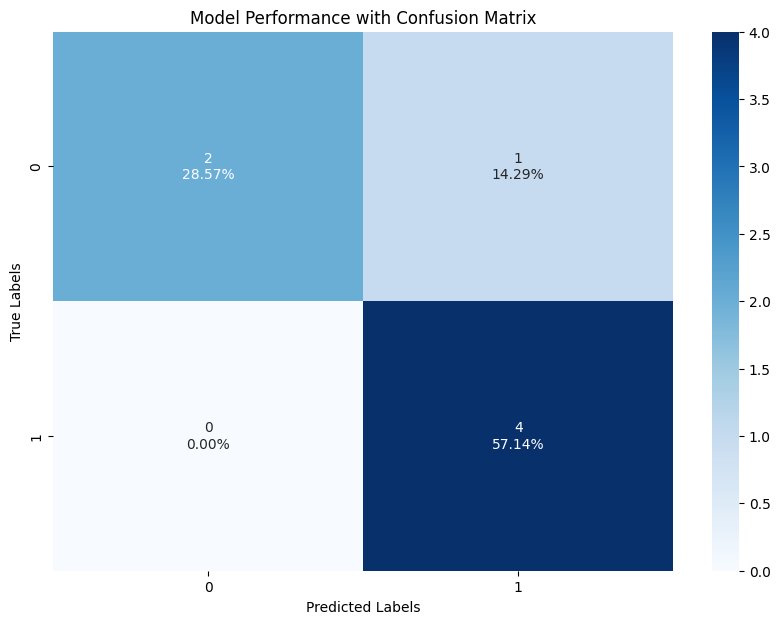

In [ ]:
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Function to create and visualize a confusion matrix
def make_confusion_matrix(classifier, y_true):
    # Generate predictions using the classifier
    y_pred = classifier.predict(X_test)

    # Calculate the confusion matrix
    cf_matrix = metrics.confusion_matrix(y_true, y_pred)

    # Create labels for the matrix with counts and percentages
    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(cf_matrix.shape[0], cf_matrix.shape[1])

    # Set the size of the plot
    plt.figure(figsize=(10,7))

    # Create a heatmap with the confusion matrix, labels, and a color map
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

    # Add a title and axis labels
    plt.title('Model Performance with Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')

    # Display the plot
    plt.show()

# Call the function with the classifier and the test labels
make_confusion_matrix(chosen_classifier_new, y_test)


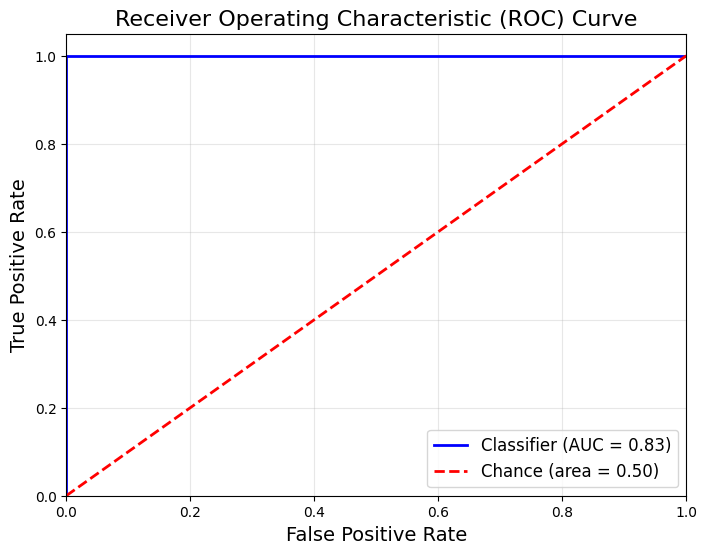

In [ ]:
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Calculate the AUC (Area Under the Curve) for the ROC (Receiver Operating Characteristic) curve
# This metric is used to evaluate the performance of a binary classifier.
rf_roc_auc = roc_auc_score(y_test, chosen_classifier_new.predict(X_test))

# Generate the data points for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, chosen_classifier_new.predict_proba(X_test)[:,1])

# Initialize the plot
plt.figure(figsize=(8, 6))

# Plot the ROC curve
plt.plot(fpr, tpr, label=f'Classifier (AUC = {rf_roc_auc:.2f})', color='blue', lw=2)

# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'r--', label='Chance (area = 0.50)', lw=2)

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.legend(loc="lower right", fontsize=12)
plt.grid(True, alpha = 0.3)

# Display the plot
plt.show()


In [ ]:
# install just once, after that comment the code for better performance 
# %pip install nltk

# import nltk
# nltk.download('punkt')

In [ ]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.util import bigrams


**Top 10 Bigrams in the "news2" file:**

This is an indicator of the top 10 frequently occurring pairs of consecutive words in the "news2" file. These pairs, known as bigrams, provide insight into common word combinations or phrases found within the titles of news articles. Analyzing bigrams can offer valuable information about prevalent topics, themes, or language patterns present in the dataset.

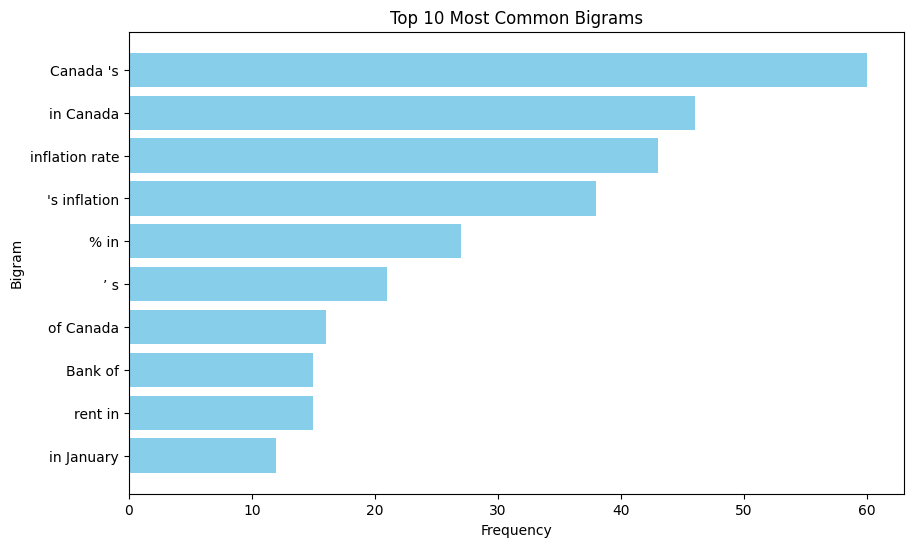

In [ ]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.util import bigrams
import matplotlib.pyplot as plt
from collections import Counter

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('news2.csv')

# Tokenize the text data into words
tokenized_text = df['Title'].apply(word_tokenize)

# Generate bigrams from the tokenized words
bigram_list = []
for text in tokenized_text:
    bigram_list.extend(list(bigrams(text)))

# Count the frequency of each bigram
bigram_counts = Counter(bigram_list)

# Get the top 10 most common bigrams
top_10_bigrams = bigram_counts.most_common(10)

# Extract bigram words and their frequencies
bigram_words = [bigram[0][0] + ' ' + bigram[0][1] for bigram in top_10_bigrams]
bigram_frequencies = [freq for _, freq in top_10_bigrams]

# Plot the top 10 most common bigrams
plt.figure(figsize=(10, 6))
plt.barh(bigram_words, bigram_frequencies, color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Bigram')
plt.title('Top 10 Most Common Bigrams')
plt.gca().invert_yaxis()  # Invert y-axis to display the most common bigrams at the top
plt.show()


**Top 10 Tryigrams in the "news2" file:**

This highlights the top 10 frequently occurring triplets of consecutive words in the "news2" file. These triplets, referred to as trigrams, offer insights into recurring word sequences or phrases observed within the titles of news articles. Analyzing trigrams enables the identification of prevalent topics, recurring themes, or linguistic patterns prevalent in the dataset.

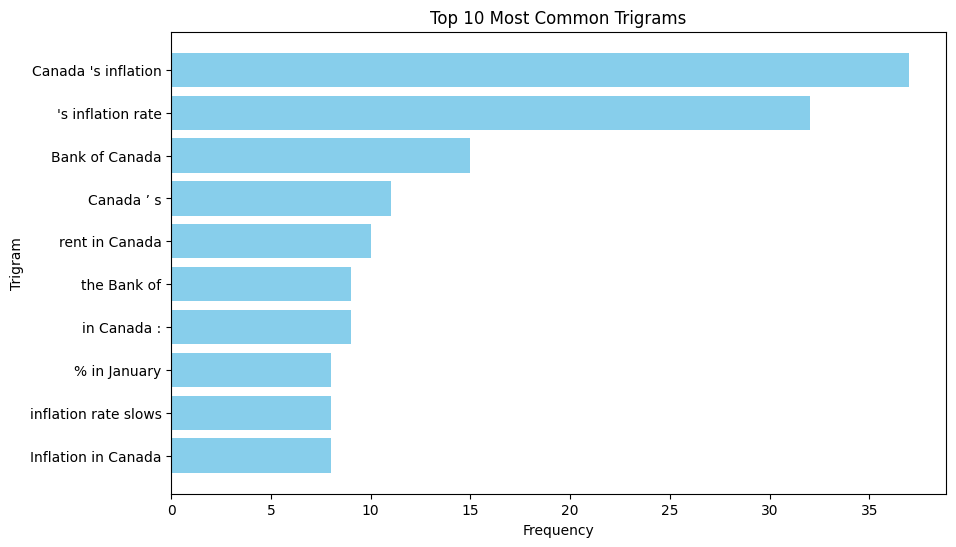

In [ ]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
import matplotlib.pyplot as plt
from collections import Counter

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('news2.csv')

# Preprocess the text data (assuming the text is in a column named 'Title')

# Tokenize the text data into words
tokenized_text = df['Title'].apply(word_tokenize)

# Generate trigrams from the tokenized words
trigram_list = []
for text in tokenized_text:
    trigram_list.extend(list(ngrams(text, 3)))

# Count the frequency of each trigram
trigram_counts = Counter(trigram_list)

# Get the top 10 most common trigrams
top_10_trigrams = trigram_counts.most_common(10)

# Extract trigram words and their frequencies
trigram_words = [' '.join(trigram[0]) for trigram in top_10_trigrams]
trigram_frequencies = [freq for _, freq in top_10_trigrams]

# Plot the top 10 most common trigrams
plt.figure(figsize=(10, 6))
plt.barh(trigram_words, trigram_frequencies, color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Trigram')
plt.title('Top 10 Most Common Trigrams')
plt.gca().invert_yaxis()  # Invert y-axis to display the most common trigrams at the top
plt.show()


**Top 10 Most Common Words in the "news2" file:**

This analysis reveals the top 10 most frequently occurring words found in the titles of news articles within the "news2" file. By tokenizing the text data and counting the frequency of each word, this approach identifies the words that appear most often across the dataset. Understanding the prevalence of these words provides insights into the primary topics, subjects, or language usage within the news articles.

In [ ]:
# Word Frequency Analysis
from collections import Counter

# Tokenize the text data into words
tokenized_text = df['Title'].apply(word_tokenize)

# Flatten the list of tokenized words
words = [word for sublist in tokenized_text for word in sublist]

# Count the frequency of each word
word_freq = Counter(words)

# Display the top 10 most common words
top_10_words = word_freq.most_common(10)
print("Top 10 Most Common Words:")
for word, freq in top_10_words:
    print(f"{word}: {freq}")


Top 10 Most Common Words:
Canada: 163
in: 156
inflation: 109
to: 107
's: 94
rent: 91
,: 90
rate: 75
:: 74
of: 71


**Word Cloud Visualization for the "news2" file:**

This visualization presents a word cloud generated from the titles of news articles within the "news2" dataset. The word cloud visually represents the frequency of words, with larger words indicating higher frequency. By aggregating and displaying the most common words in a visually appealing manner, the word cloud offers a quick overview of the prominent themes or topics present in the news articles.

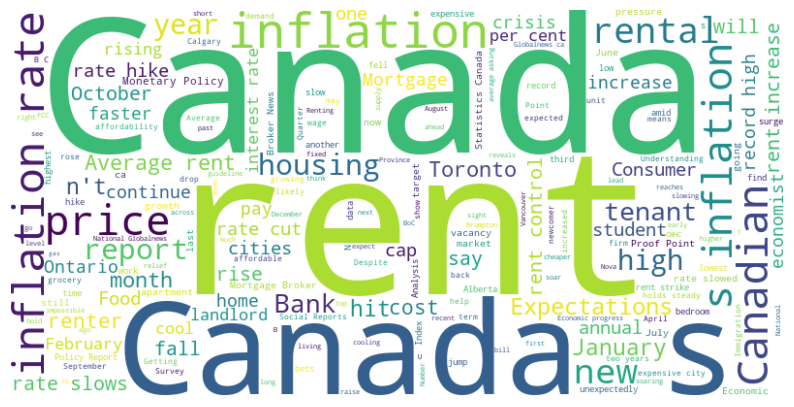

In [ ]:
# Word Cloud Visualization
from wordcloud import WordCloud

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(words))

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


**Named Entity Recognition (NER) Analysis for the "news2" file:**

This analysis utilizes spaCy's NER model to identify named entities (such as persons, organizations, locations, etc.) within the titles of news articles in the "news2" dataset. The code extracts and displays these named entities along with their corresponding labels, providing insights into the specific entities mentioned and their respective categories or types.

In [ ]:
# install just once, after that comment the code for better performance 
# !python -m spacy download en_core_web_sm


In [ ]:
# Named Entity Recognition (NER)
import spacy

# Load the English language model for spaCy
nlp = spacy.load('en_core_web_sm')

# Apply named entity recognition to each title
ner_results = []
for title in df['Title']:
    doc = nlp(title)
    for ent in doc.ents:
        ner_results.append((ent.text, ent.label_))

# Display the named entities and their labels
print("Named Entities and Labels:")
for ent, label in ner_results:
    print(f"{ent}: {label}")


Named Entities and Labels:
Canadians - Statistics Canada: ORG
Canadian: NORP
Canada: GPE
2.9%: PERCENT
January: DATE
Canada: GPE
2.8 per cent: MONEY
Canada: GPE
2.8%: PERCENT
February: DATE
2nd month in a row: DATE
Canada: GPE
2%: PERCENT
2017 to 2022: DATE
2%: PERCENT
Canada: GPE
Canada: GPE
31-year: DATE
6.7%: PERCENT
BoC: WORK_OF_ART
Shelter Inflation Problem: ORG
Canadian: NORP
The Bank of Canada's: ORG
the Inflation Reduction Act: LAW
Canada: GPE
Canada: GPE
2.8%: PERCENT
Canada: GPE
October: DATE
6.9%: PERCENT
Canada: GPE
the 1980s: DATE
1990s: DATE
Canada: GPE
2.8%: PERCENT
Canada: GPE
2.9%: PERCENT
January: DATE
Canada: GPE
30-year: DATE
5.7%: PERCENT
Canada: GPE
3.1%: PERCENT
last month: DATE
39-year: DATE
8.1%: PERCENT
Understanding Inflation Dynamics: ORG
The Role of Government Expenditures: ORG
the Bank of Canada’s: ORG
Canada: GPE
3.4%: PERCENT
almost 2 years: DATE
Canada: GPE
October 2023: DATE
Canada: GPE
8.1%: PERCENT
June: DATE
April: DATE
up to 4.4%: PERCENT
3.8%: PER

## **Chapter 5 - Conclusions**

Here are some conclusions about the development of the models and sentiment analysis in this project:

1. **Model Development:**
   - Several machine learning classifiers were evaluated for predicting inflation changes based on the features extracted from the dataset.
   - The models were trained and evaluated using techniques such as cross-validation and performance metrics like accuracy, recall, and ROC AUC score.
   - Different classifiers such as Naive Bayes, Logistic Regression, Random Forest, Decision Tree, and Support Vector Machine (SVM) were tested to identify the best-performing model.

2. **Feature Selection:**
   - Feature selection techniques like pipeline with SelectFromModel were employed to identify the most relevant features for the models.
   - Features were selected based on their importance in predicting inflation changes, enhancing model efficiency and reducing computational complexity.

3. **Sentiment Analysis:**
   - Sentiment analysis was conducted on news article titles to gauge the overall sentiment surrounding inflation-related topics.
   - TextBlob was used to analyze sentiment polarity and subjectivity, providing insights into the general sentiment trend over time.
   - Visualization techniques such as line plots were employed to visualize sentiment analysis results, enabling stakeholders to identify sentiment patterns and trends.

4. **Model Evaluation and Performance:**
   - Model performance was assessed using various evaluation metrics, including accuracy, recall, confusion matrix, and ROC AUC score.
   - The best-performing model was selected based on its ability to accurately predict inflation changes and its generalization capability on unseen data.
   - Performance metrics were used to quantify the effectiveness of the models in capturing inflation dynamics and providing actionable insights.

5. **Integration of Data Analysis Techniques:**
   - Data preprocessing, feature engineering, model development, and sentiment analysis were integrated into a cohesive workflow to derive meaningful insights from the dataset.
   - By combining multiple data analysis techniques, the project aimed to provide a comprehensive understanding of inflation trends and sentiment dynamics.

6. **Future Considerations:**
   - Further refinement of models and sentiment analysis techniques could enhance predictive accuracy and provide more nuanced insights into inflation-related dynamics.
   - Continuous monitoring and updating of models with new data can improve their performance and adaptability to changing economic conditions.
   - Exploring advanced machine learning algorithms and natural language processing techniques may offer additional opportunities for improving model accuracy and sentiment analysis capabilities.

Overall, the development of models and sentiment analysis in this project aimed to provide valuable insights into inflation dynamics and sentiment trends, aiding stakeholders in making informed decisions in the financial and economic domain.

## **References**

Hunter, J. D. (2007). Matplotlib: A 2D graphics environment. Computing in Science & Engineering, 9(3), 90-95.

Python Software Foundation. (n.d.). Matplotlib: Visualization with Python. Retrieved from https://matplotlib.org/

Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., ... & Vanderplas, J. (2011). Scikit-learn: Machine learning in Python. Journal of Machine Learning Research, 12(Oct), 2825-2830.

Raschka, S., & Mirjalili, V. (2019). Python Machine Learning: Machine Learning and Deep Learning with Python, scikit-learn, and TensorFlow 2. Packt Publishing Ltd.

**Websites:**

Statistics Canada. (n.d.). A snapshot of how inflation is affecting Canadians - Statistics Canada. Retrieved from https://news.google.com/articles/CBMiVGh0dHBzOi8vd3d3LnN0YXRjYW4uZ2MuY2EvbzEvZW4vcGx1cy8zMDk2LXNuYXBzaG90LWhvdy1pbmZsYXRpb24tYWZmZWN0aW5nLWNhbmFkaWFuc9IBAA?hl=en-CA&gl=CA&ceid=CA%3Aen

Bank of Canada. (n.d.). What's happening to inflation and why it matters. Retrieved from https://news.google.com/articles/CBMiVGh0dHBzOi8vd3d3LmJhbmtvZmNhbmFkYS5jYS8yMDIyLzEwL3doYXRzLWhhcHBlbmluZy10by1pbmZsYXRpb24tYW5kLXdoeS1pdC1tYXR0ZXJzL9IBAA?hl=en-CA&gl=CA&ceid=CA%3Aen

TD Economics. (n.d.). Canadian Inflation: A New Vintage. Retrieved from https://news.google.com/articles/CBMiMWh0dHBzOi8vZWNvbm9taWNzLnRkLmNvbS9jYS1pbmZsYXRpb24tbmV3LXZpbnRhZ2XSAQA?hl=en-CA&gl=CA&ceid=CA%3Aen

CBC News. (n.d.). Canada's inflation rate slowed to 2.9% in January as gas prices fell. Retrieved from https://news.google.com/articles/CBMiQWh0dHBzOi8vd3d3LmNiYy5jYS9uZXdzL2J1c2luZXNzL2luZmxhdGlvbi1qYW51YXJ5LTIwMjQtMS43MTE5Nzk20gEgaHR0cHM6Ly93d3cuY2JjLmNhL2FtcC8xLjcxMTk3OTY?hl=en-CA&gl=CA&ceid=CA%3Aen

CP24. (n.d.). Canada inflation rate ticks down to 2.8 per cent. Retrieved from https://news.google.com/articles/CBMidWh0dHBzOi8vd3d3LmNwMjQuY29tL25ld3MvdW5hbWJpZ3VvdXNseS1nb29kLWluZmxhdGlvbi1zbG93cy1pbi1mZWJydWFyeS1hcy1wcmljZS1ncm93dGgtdW5leHBlY3RlZGx5LWVhc2VzLTEuNjgxMzE0M9IBAA?hl=en-CA&gl=CA&ceid=CA%3Aen





